<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [17]:
!pip install pandas

In [18]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [19]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-01-12 15:58:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  56.9MB/s    in 2.7s    

2025-01-12 15:58:20 (56.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [20]:
import sqlite3
conn = sqlite3.connect('survey-data.sqlite')

### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



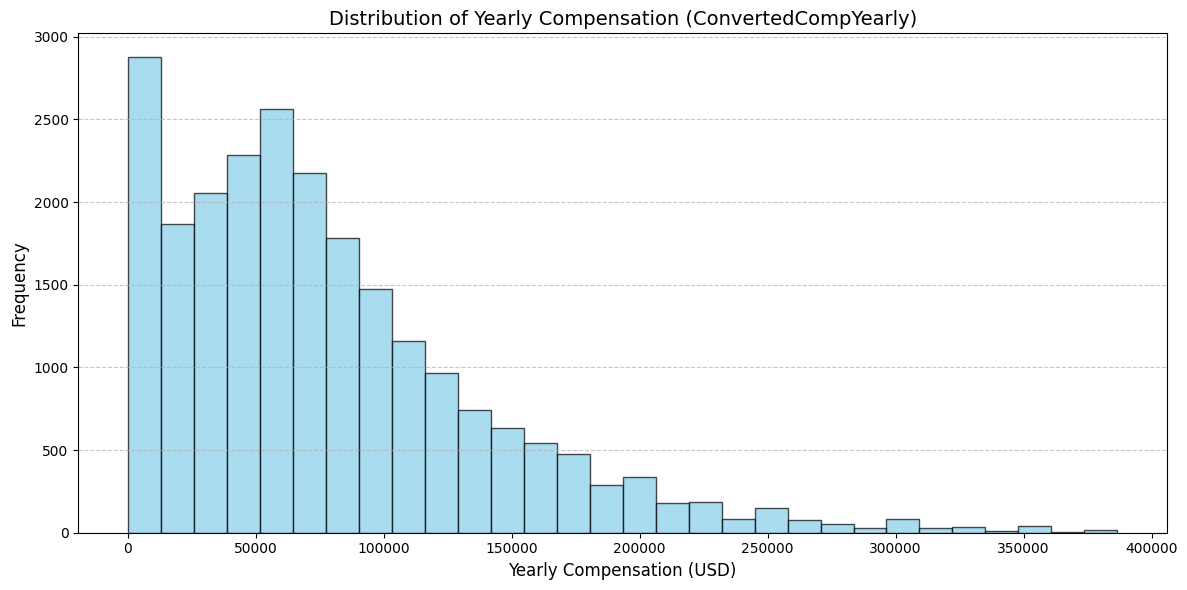

In [21]:
## Write your code here
# Query the data
query = """
SELECT ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Handle outliers: Filter data to exclude extreme values
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]  # Keep data within the 99th percentile

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(df['ConvertedCompYearly'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [11]:
cursor = conn.cursor()

# Step 1: Add a new REAL column
cursor.execute("ALTER TABLE main ADD COLUMN Age_Real REAL;")

# Step 2: Update the new column with numeric values
cursor.execute("""
UPDATE main
SET Age_Real = 
    CASE 
        WHEN Age = '18-24 years old' THEN 21.0
        WHEN Age = '25-34 years old' THEN 29.5
        WHEN Age = '35-44 years old' THEN 39.5
        WHEN Age = '45-54 years old' THEN 49.5
        WHEN Age = '55-64 years old' THEN 59.5
        WHEN Age = '65 years or older' THEN 70.0
        WHEN Age = 'Prefer not to say' THEN NULL
        WHEN Age = 'Under 18 years old' THEN 16.0
    END;
""")

# Commit changes and close the connection
conn.commit()

OperationalError: duplicate column name: Age_Real

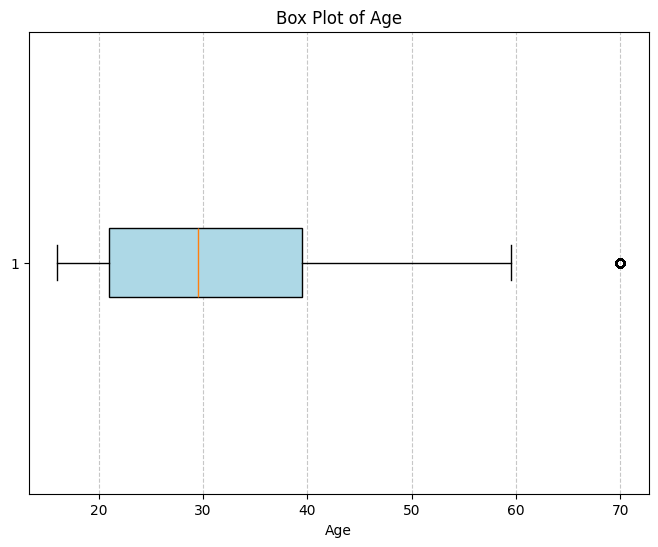

In [22]:
## Write your code here
query = "SELECT Age_Real FROM main"  
df = pd.read_sql_query(query, conn)


# Clean data: Drop rows with missing or null values
data_cleaned = df['Age_Real'].dropna()

# Plot the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data_cleaned, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



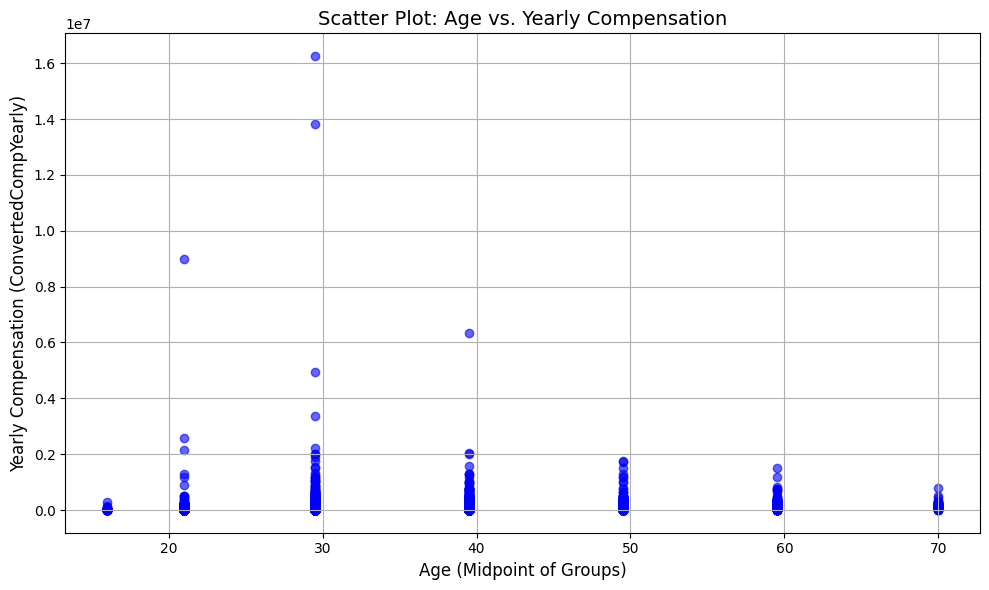

In [23]:
## Write your code here
# Query the data
query = """
SELECT Age_Real, ConvertedCompYearly
FROM main
WHERE Age_Real IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age_Real'], df['ConvertedCompYearly'], alpha=0.6, color='b')

# Customize the plot
plt.title('Scatter Plot: Age vs. Yearly Compensation', fontsize=14)
plt.xlabel('Age (Midpoint of Groups)', fontsize=12)
plt.ylabel('Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


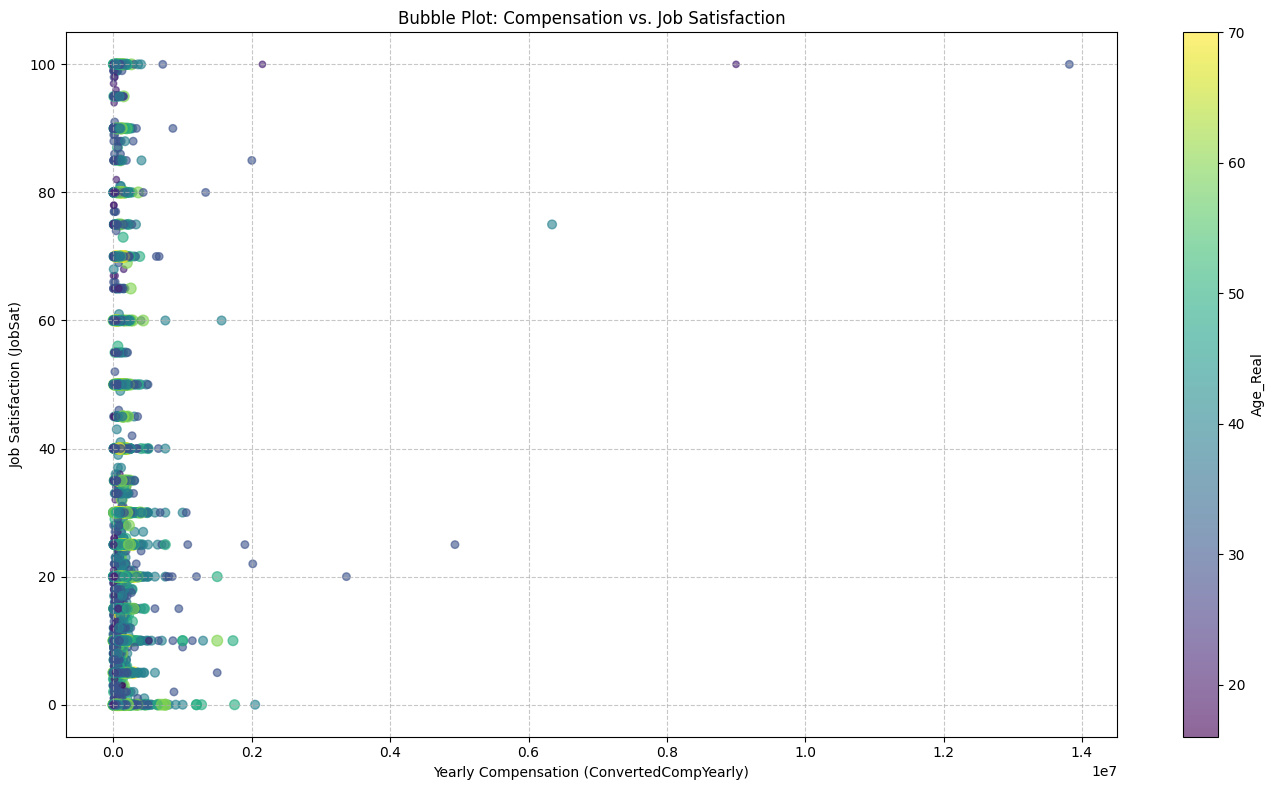

In [24]:
## Write your code here
# Query the data
query = """
SELECT ConvertedCompYearly, JobSatPoints_6, Age_Real
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL AND Age_Real IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Remove rows with NaN or invalid values
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_Real'])

# Plot the bubble plot
plt.figure(figsize=(14, 8))
bubble = plt.scatter(
    x=df_cleaned['ConvertedCompYearly'],
    y=df_cleaned['JobSatPoints_6'],
    s=df_cleaned['Age_Real'],  # Bubble size represents Age
    alpha=0.6,
    c=df_cleaned['Age_Real'],  # Bubble color represents Age
    cmap='viridis'
)

# Add a color bar for Age
plt.colorbar(bubble, label='Age_Real')

# Customize plot
plt.title('Bubble Plot: Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSat)')
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



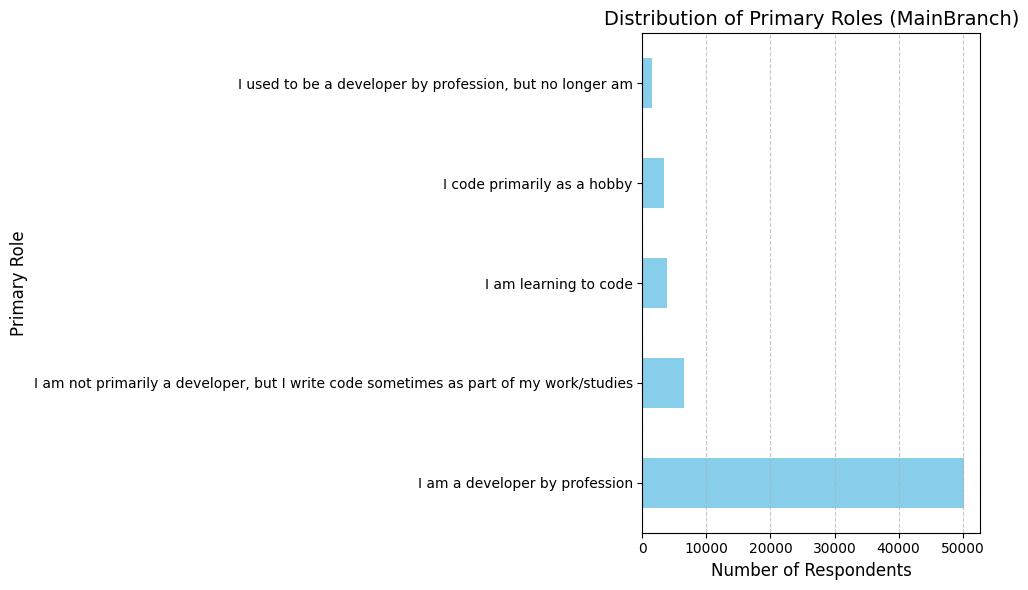

In [25]:
## Write your code here
# Query the data
query = """
SELECT MainBranch
FROM main
WHERE MainBranch IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Count the occurrences of each unique value in 'MainBranch'
main_branch_counts = df['MainBranch'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue')

# Customize the plot
plt.title('Distribution of Primary Roles (MainBranch)', fontsize=14)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Primary Role', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



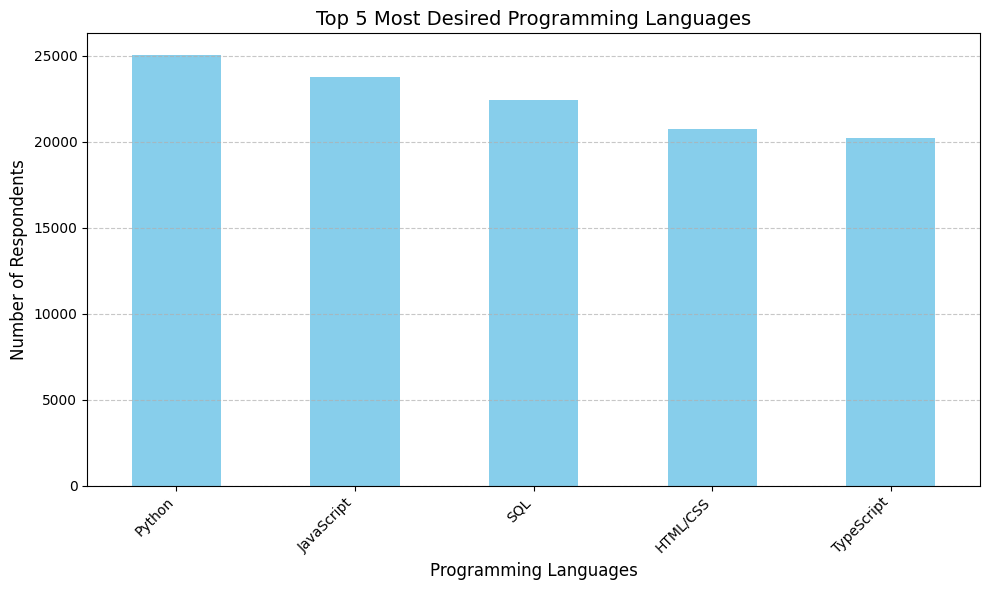

In [26]:
## Write your code here
# Query the data
query = """
SELECT LanguageWantToWorkWith
FROM main
WHERE LanguageWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Split the 'LanguageWantToWorkWith' into individual languages and count occurrences
languages = df['LanguageWantToWorkWith'].str.split(';').explode().value_counts()

# Get the top 5 most desired languages
top_languages = languages.head(5)

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Top 5 Most Desired Programming Languages', fontsize=14)
plt.xlabel('Programming Languages', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


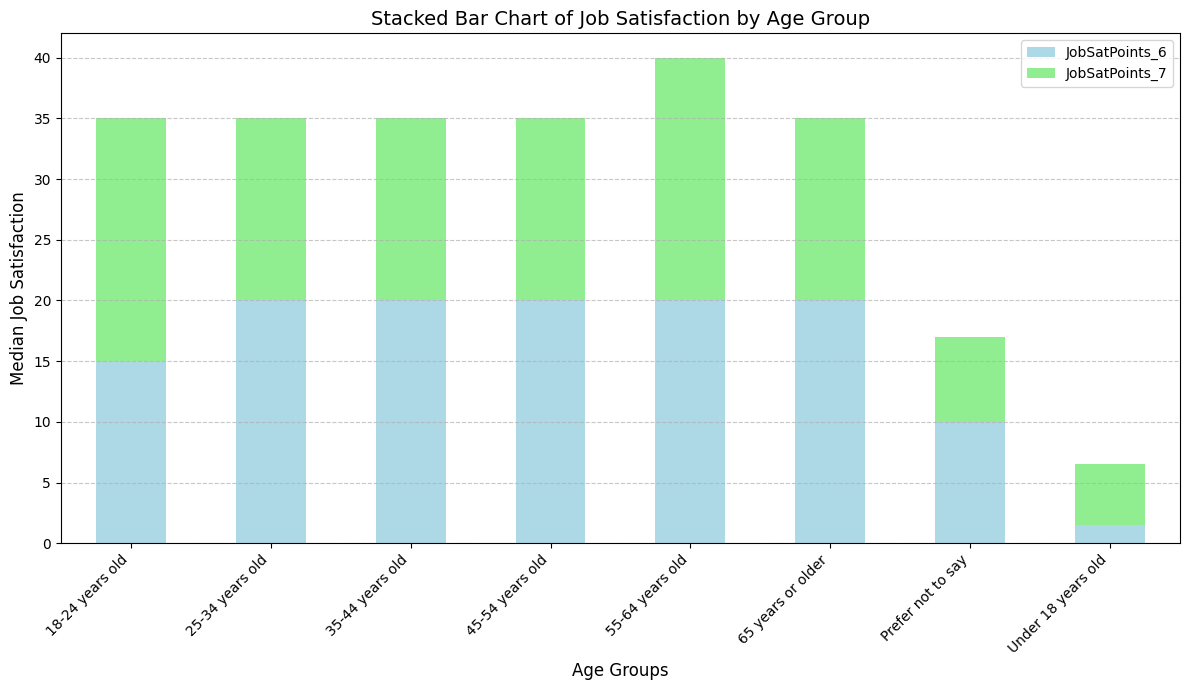

In [27]:
## Write your code here

# Query the data
query = """
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND JobSatPoints_7 IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Group by Age and calculate the median for JobSatPoints_6 and JobSatPoints_7
age_group_medians = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot a stacked bar chart
ax = age_group_medians.plot(kind='bar', stacked=True, figsize=(12, 7), color=['lightblue', 'lightgreen'])

# Customize the plot
plt.title('Stacked Bar Chart of Job Satisfaction by Age Group', fontsize=14)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Median Job Satisfaction', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



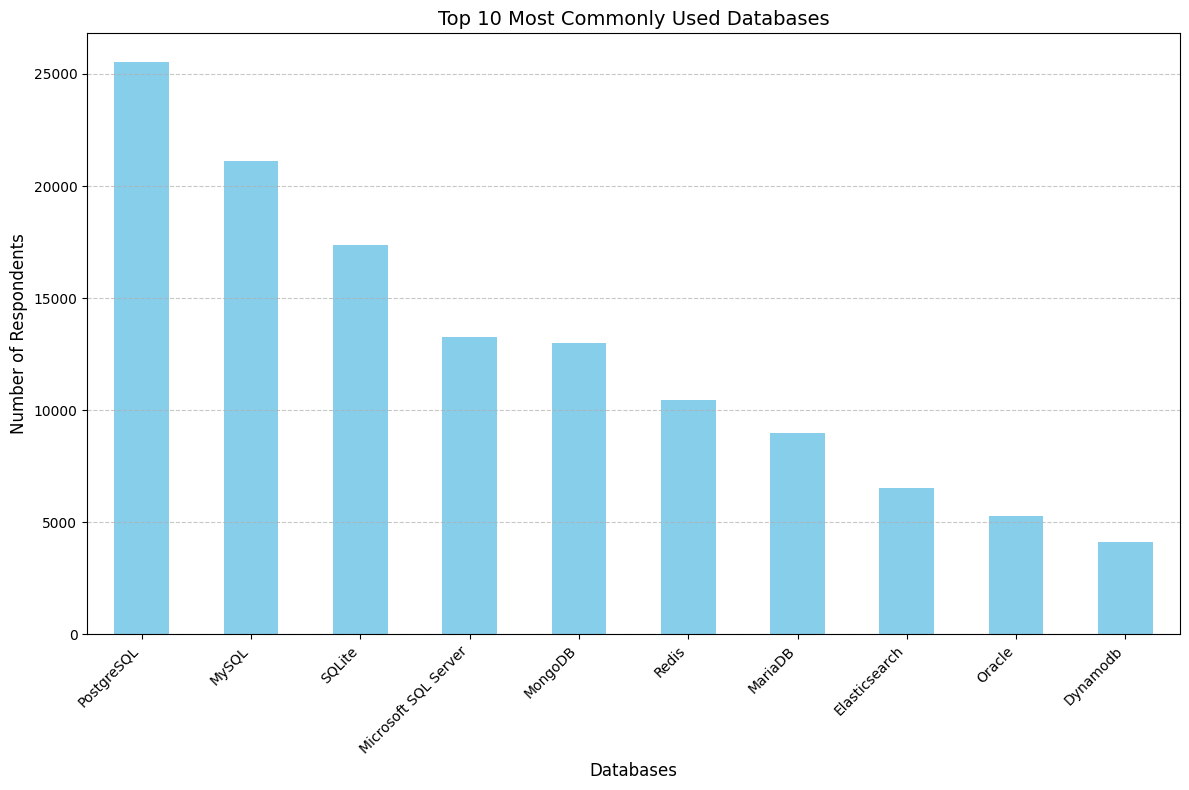

In [28]:
## Write your code here
# Query the data
query = """
SELECT DatabaseHaveWorkedWith
FROM main
WHERE DatabaseHaveWorkedWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Split 'DatabaseHaveWorkedWith' into individual databases
df_expanded = df.assign(DatabaseHaveWorkedWith=df['DatabaseHaveWorkedWith'].str.split(';')).explode('DatabaseHaveWorkedWith')

# Count the frequency of each database
database_counts = df_expanded['DatabaseHaveWorkedWith'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 8))
database_counts.head(10).plot(kind='bar', color='skyblue')  # Display top 10 databases

# Customize the plot
plt.title('Top 10 Most Commonly Used Databases', fontsize=14)
plt.xlabel('Databases', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_393/52317610.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_compensation = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()


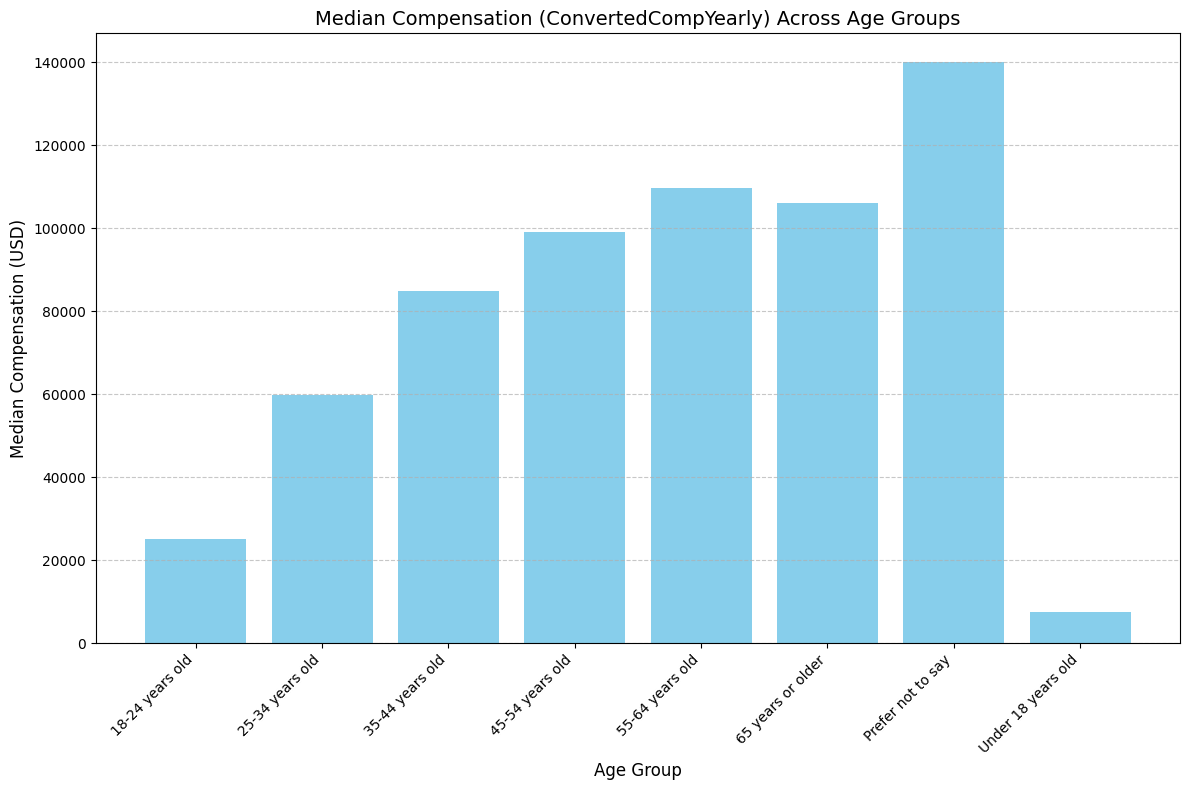

In [29]:
## Write your code here

# Query the data
query = """
SELECT Age, ConvertedCompYearly
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert age to a categorical type (if not already done)
df['Age'] = df['Age'].astype('category')

# Calculate the median compensation for each age group
median_compensation = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(median_compensation['Age'], median_compensation['ConvertedCompYearly'], color='skyblue')

# Customizing the chart
plt.title('Median Compensation (ConvertedCompYearly) Across Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Compensation (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



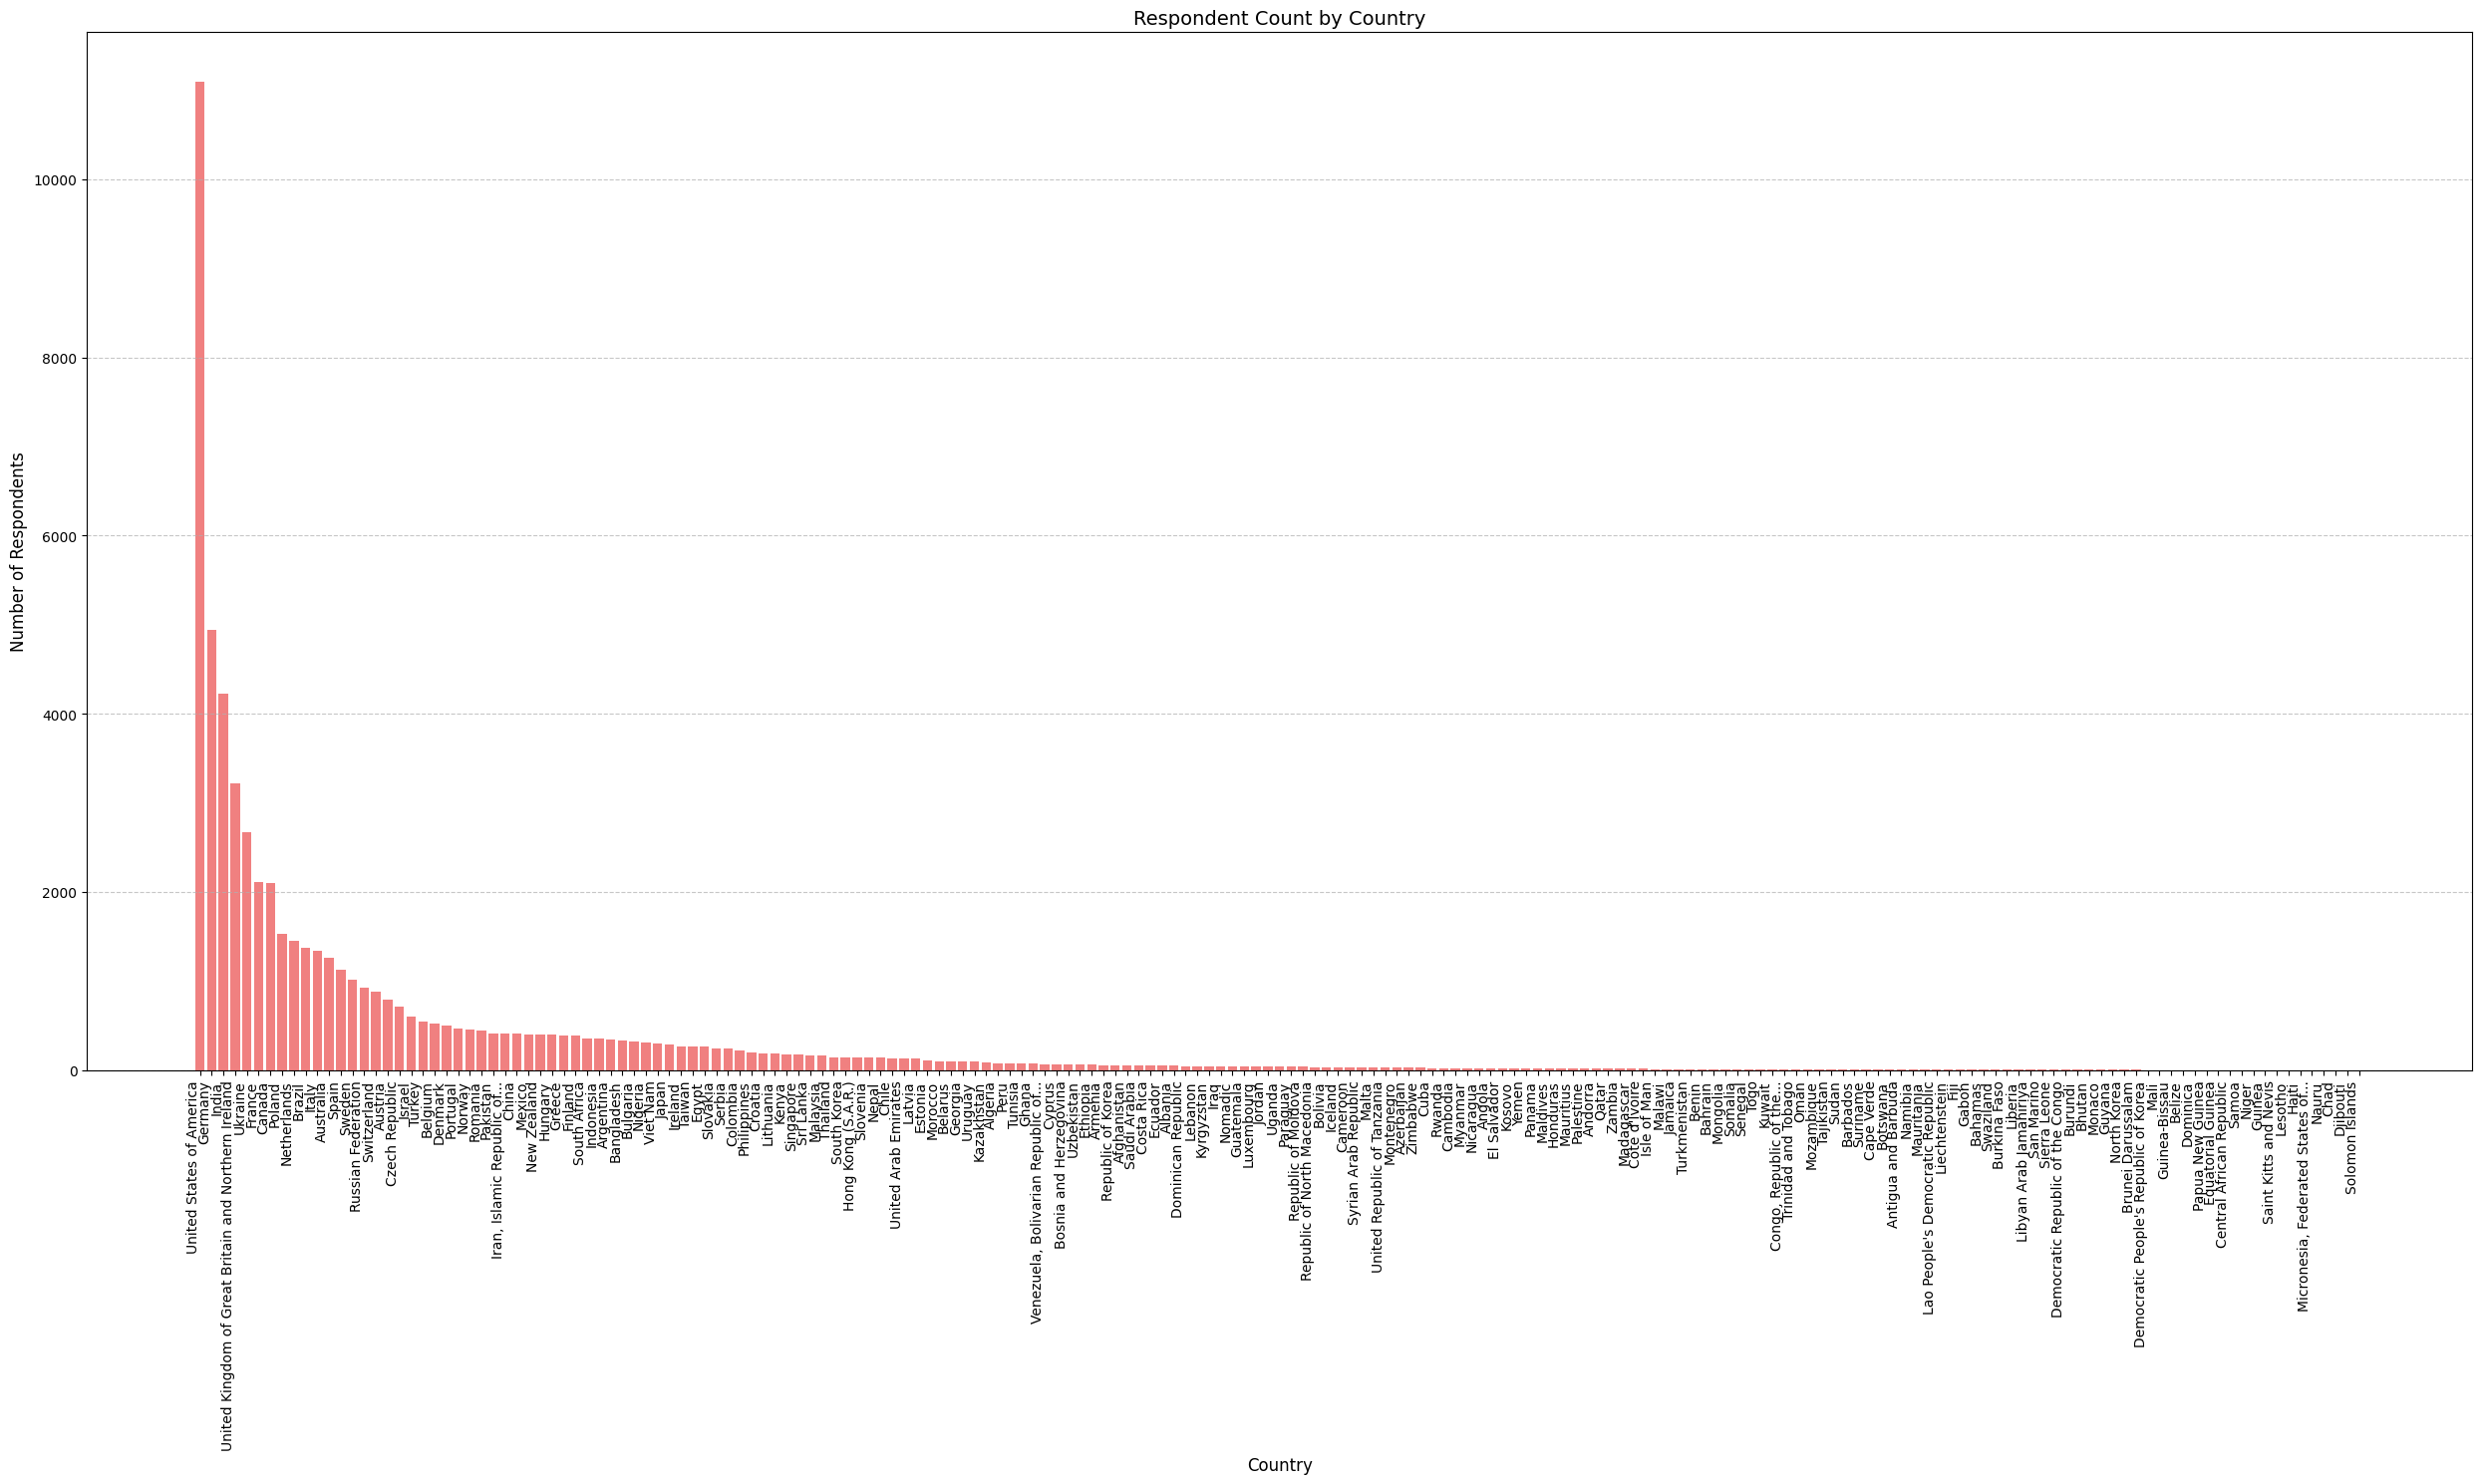

In [36]:
## Write your code here
# Query the data
query = """
SELECT Country
FROM main
WHERE Country IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Count the number of respondents for each country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Respondent Count']

# Plotting the bar chart
plt.figure(figsize=(25, 15))
plt.bar(country_counts['Country'], country_counts['Respondent Count'], color='lightcoral')

# Customizing the chart
plt.title('Respondent Count by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [37]:
conn.close()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
